In [126]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn import preprocessing

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [127]:
#initialize dfx, dataframe with index date and columns=features
dfx = pd.read_csv("Macro_economic_var.csv")
dfx['Date'] = pd.to_datetime(dfx['Date'])
dfx.set_index('Date', inplace=True)
dfx.tail(5)

,ConsumerPriceIndex,Dow Jones,GDP,GDP_Construction,"All Employees, Residential Building [000]",Producer Price Index by Industry: Construction Sand and Gravel Mining,Producer Price Index by Commodity: Machinery and Equipment,Maintenance and Repair of Nonresidential Buildings,Purchase Only House Price Index,New Manufactured Homes Avg Sales proce,&P/Case-Shiller U.S. National Home Price Index,Industrial Production: Manufacturing: Durable Goods: Sawmills and Wood
Date,,,,,,,,,,,,
2021-05-01,269195,34529.45,22741.0,951.0,853.1,414.400,149.900,123.900,342.22,69900,255.496,100.3333
2021-06-01,271696,34502.51,22741.0,951.0,867.8,416.000,151.400,126.000,348.71,70200,261.226,97.5105
2021-07-01,273003,34935.47,23202.3,951.1,882.1,416.351,151.461,127.353,353.67,76000,265.567,93.8086
2021-08-01,273567,35360.73,23202.3,951.1,883.1,419.185,152.851,129.793,356.24,80000,268.880,95.1096
2021-09-01,274310,33843.92,23202.3,951.1,876.4,419.267,155.527,131.585,358.66,78800,271.420,93.3268


In [128]:
#initialize dfy, scaled sales data
dfy = pd.read_csv("Scaled_Sales_Toilet_Mansfield.csv")
dfy = dfy.drop(columns="seasonal")
dfy['Date'] = pd.to_datetime(dfy['Date'])
dfy.set_index('Date', inplace=True)
dfy.head(5)

,Sales_UND
Date,
2017-01-01,1.018430
2017-02-01,1.038805
2017-03-01,2.782969
2017-04-01,1.311840
2017-05-01,1.925150


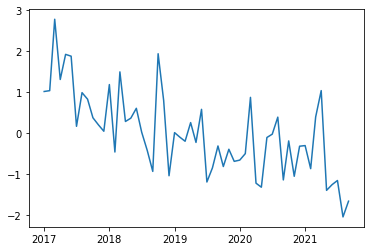

In [129]:
plt.plot(dfy)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size = 0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Coefficients:  [[-0.07674451 -0.44391125  1.25673919 -0.96024077 -0.22787131  0.13216783
  -0.0159491  -0.45166291  3.03079352  0.22225402 -3.01988124  0.25417933]]
R-squared:  0.6968488087782332


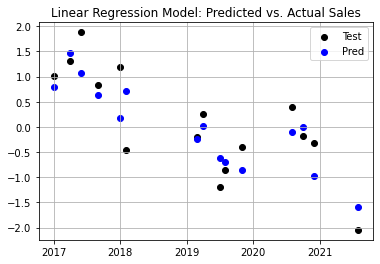

In [131]:
linearReg = LinearRegression()  
linearReg.fit(X_train, y_train)
y_pred = linearReg.predict(X_test)

print("Coefficients: ", linearReg.coef_)
print("R-squared: ", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
handles = ['Test', 'Pred']

plt.scatter(y_test.index, y_test, c="BLACK")
plt.scatter(y_test.index, y_pred, c="BLUE")
plt.title("Linear Regression Model: Predicted vs. Actual Sales")
plt.legend(handles)
plt.grid(True)

C:\Users\hfara\AppData\Local\Temp\ipykernel_30104\552540662.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=18).fit(X_train, y_train)


R-squared:  0.5910969699234438


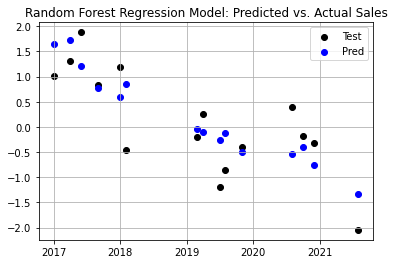

In [132]:
rf = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=18).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("R-squared: ", r2_score(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
handles = ['Test', 'Pred']

plt.scatter(y_test.index, y_test, c="BLACK")
plt.scatter(y_test.index, y_pred_rf, c="BLUE")
plt.title("Random Forest Regression Model: Predicted vs. Actual Sales")
plt.legend(handles)
plt.grid(True)

R-squared:  0.6454378962891942


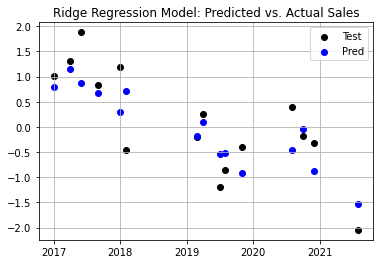

In [133]:
ridgeModel = Ridge(alpha=1.0)
ridgeModel.fit(X_train, y_train)
y_pred_ridge = ridgeModel.predict(X_test)

print("R-squared: ", r2_score(y_test, y_pred_ridge))
r2 = r2_score(y_test, y_pred_ridge)
handles = ['Test', 'Pred']

plt.scatter(y_test.index, y_test, c="BLACK")
plt.scatter(y_test.index, y_pred_ridge, c="BLUE")
plt.title("Ridge Regression Model: Predicted vs. Actual Sales")
plt.legend(handles)
plt.grid(True)

In [134]:
#pickle model and scaler for use in client's notebook
file = open('linearModel.pickle', 'wb')
pickle.dump(linearReg, file)
file1 = open('linearscaler.pickle', 'wb')
pickle.dump(scaler, file1)
file2 = open('dfx.pickle', 'wb')
pickle.dump(dfx, file2)
file3 = open('dfy.pickle', 'wb')
pickle.dump(dfy, file3)
file4 = open('rf.pickle', 'wb')
pickle.dump(rf, file4)
file5 = open('ridge.pickle', 'wb')
pickle.dump(ridgeModel, file5)